# Module 1 Practice: John Snow's Cholera Map 

In this practice, we will load the data for John Snow's cholera map from `/dsa/data/all_datasets/CholeraDeathsPumps.csv`. It has the number of deaths and geographical coordinates of the deaths and water pumps (where count is -999). 

We will do simple scatter plots using the **`ggplot2`** library; it has many useful functions to create nice plots and graphics. Here is a handy [cheatsheet for ggplot2 library](https://github.com/rstudio/cheatsheets/blob/master/data-visualization-2.1.pdf), and the [full documentation](https://cran.r-project.org/web/packages/ggplot2/ggplot2.pdf).

**The following are examples to start using ggplot for simple plots:** 

In [1]:
# load ggplot library 
library(ggplot2)
library(dplyr)

# First, make up a data frame 
df <- data.frame(replicate(3,sample(0:100,10,rep=TRUE)))
df
str(df)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



X1,X2,X3
<int>,<int>,<int>
5,58,67
63,87,80
16,31,11
6,51,60
2,28,71
7,4,87
92,56,88
81,71,53
13,17,67


'data.frame':	10 obs. of  3 variables:
 $ X1: int  5 63 16 6 2 7 92 81 13 26
 $ X2: int  58 87 31 51 28 4 56 71 17 4
 $ X3: int  67 80 11 60 71 87 88 53 67 40


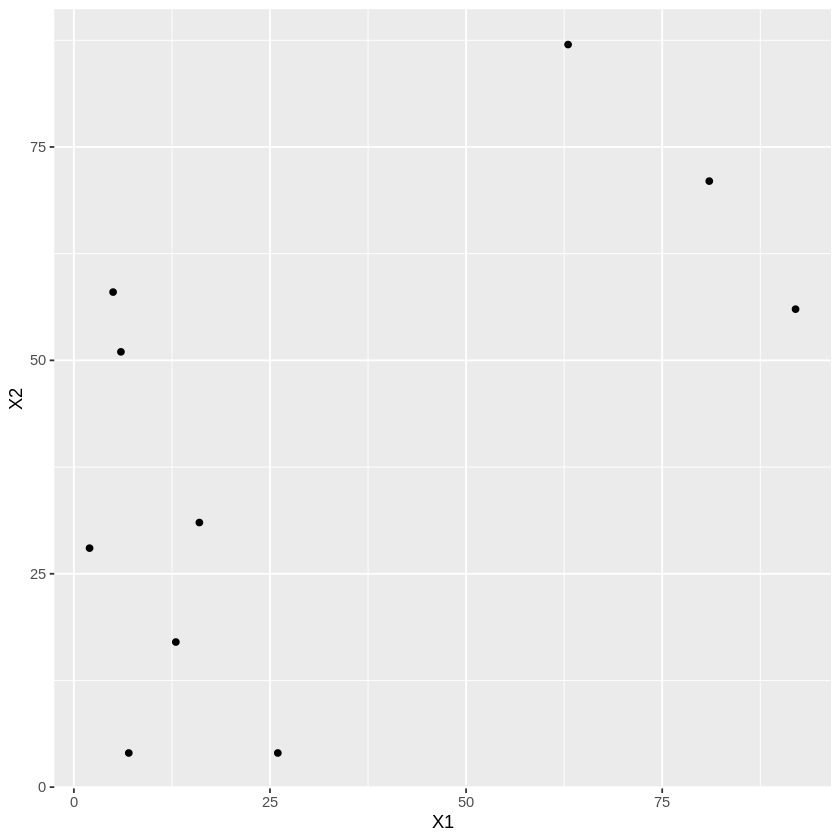

In [2]:
# every ggplot "object" should define the data frame to be used for plotting, 
# and the "aesthetics" that is the mapping between the columns of the data set and the plot. 
plot1 <- ggplot(data=df, mapping=aes(x=X1, y=X2))

# now add a "geom" to tell what type of plot it'll be: here, it's a scatter plot. 
plot1 <- plot1 + geom_point()

# display it. 
plot1

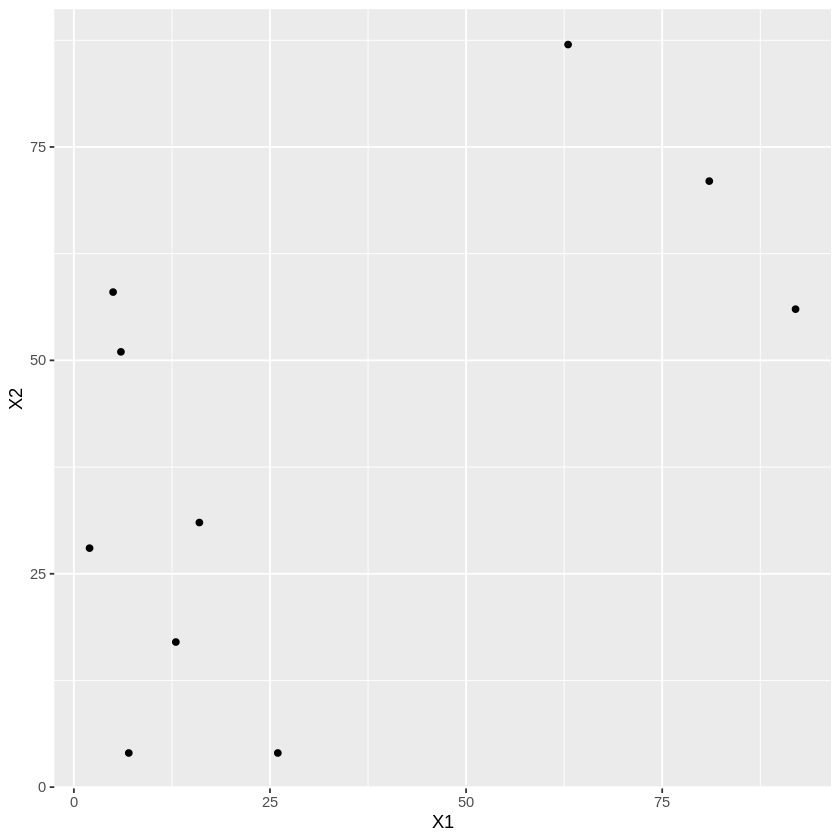

In [3]:
# The following is same as above, relying on defaults and doing everything in one line: 

ggplot(df, aes(X1, X2)) + geom_point() 


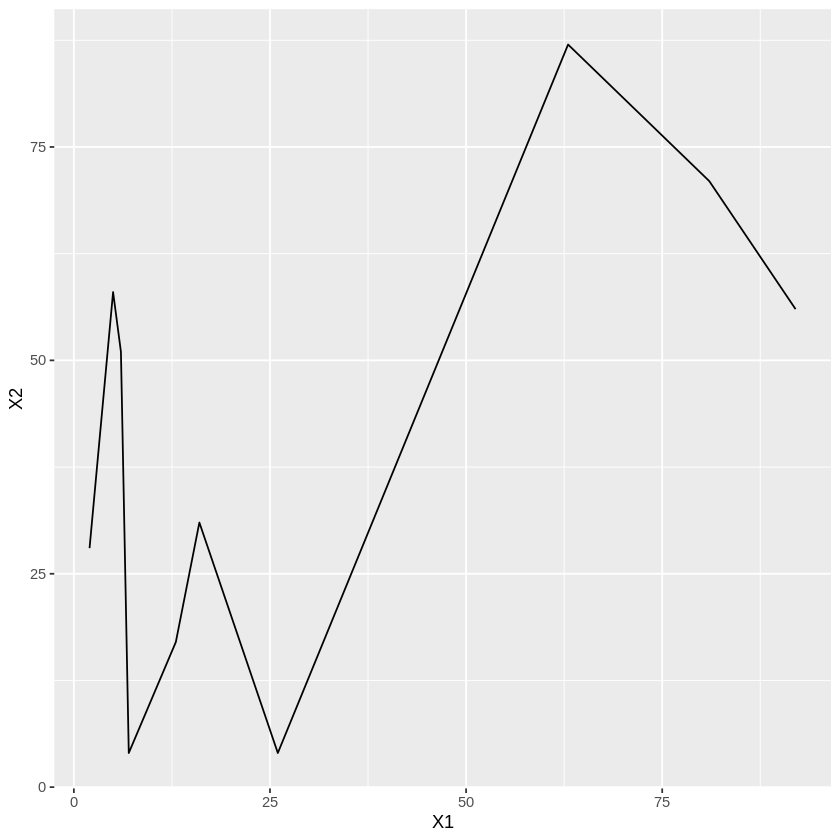

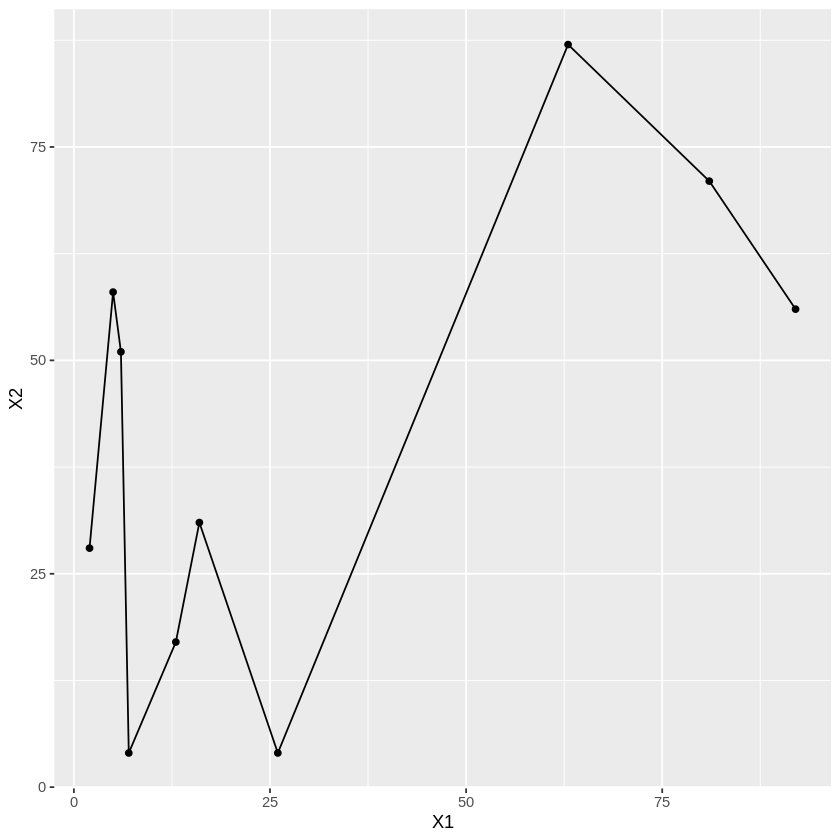

In [4]:
# Let's do a line plot: 

p1 <- ggplot(df, aes(x=X1,y=X2)) + geom_line() 
p1

# or both, we can keep adding different layers like this: 

p1 <- p1 + geom_point()
p1


**Now, we will do the following activities:** 

In [5]:
# Activity 1: read the Cholera data into a data frame, show head and tail 

cholera <- read.csv(file='/dsa/data/all_datasets/CholeraDeathsPumps.csv')

#<-- YOUR ANSWER HERE -->

head(cholera)
#tail(cholera)

count,long,lat
<int>,<dbl>,<dbl>
3,-0.137930,51.51342
2,-0.137883,51.51336
1,-0.137853,51.51332
1,-0.137812,51.51326
4,-0.137767,51.51320
2,-0.137537,51.51318


In [6]:
table(cholera$count)


-999    1    2    3    4    5    7    8   15 
   8  136   56   26   18    9    1    3    1 

In [7]:
cholera %>% filter(count<0)

count,long,lat
<int>,<dbl>,<dbl>
-999,-0.136668,51.51334
-999,-0.139586,51.51388
-999,-0.139671,51.51491
-999,-0.131630,51.51235
-999,-0.133594,51.51214
-999,-0.135919,51.51154
-999,-0.133962,51.51002
-999,-0.138199,51.51129


In [8]:
#cholera %>% filter(count>0)

In [9]:
# Activity 2: separate deaths and pumps to separate data frames 

wpumps <- cholera %>% filter(count<0)
cdeaths <- cholera %>% filter(count>0)

head(wpumps)

count,long,lat
<int>,<dbl>,<dbl>
-999,-0.136668,51.51334
-999,-0.139586,51.51388
-999,-0.139671,51.51491
-999,-0.131630,51.51235
-999,-0.133594,51.51214
-999,-0.135919,51.51154


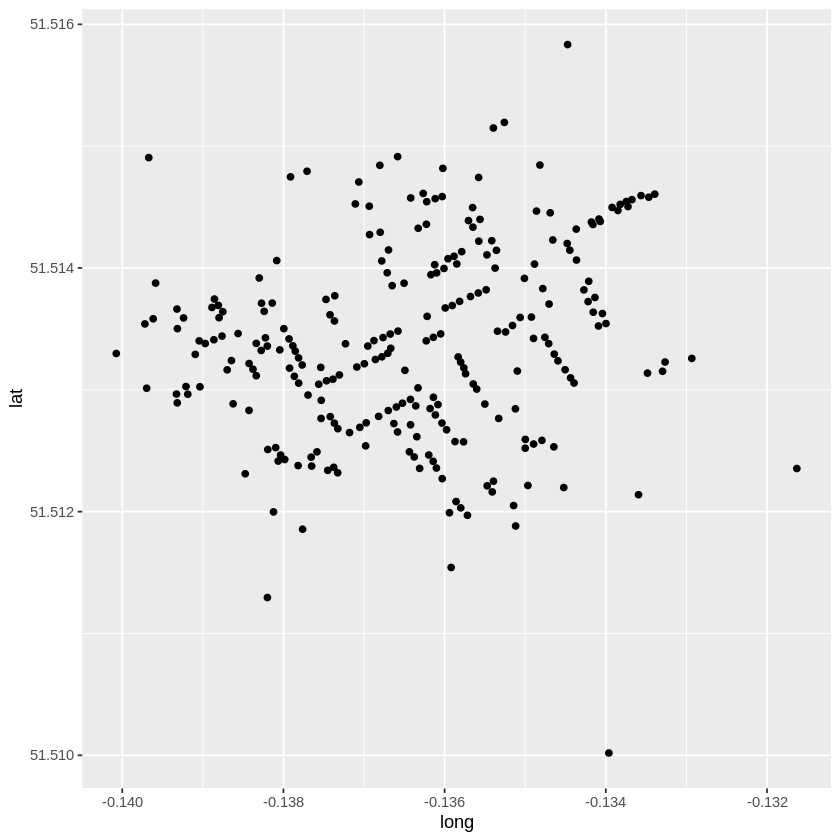

In [10]:
# Activity 3: plot all data points as a scatter plot; define aesthetics

ggplot(data=cholera, aes(long, lat)) +  geom_point()

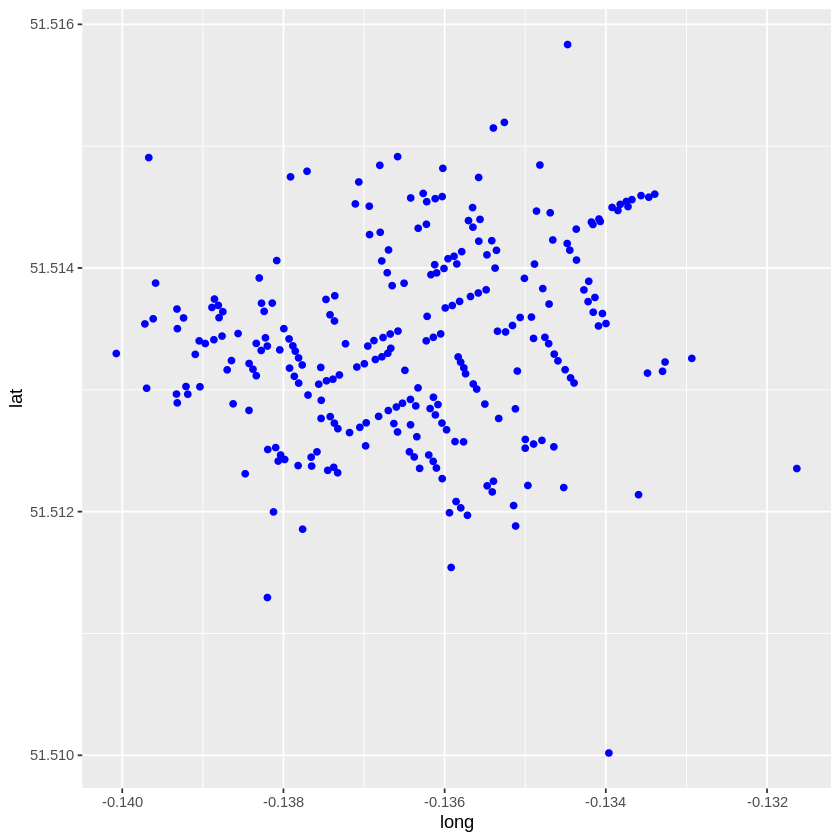

In [11]:
# Activity 4: change color of the points to blue 

ggplot(data=cholera, aes(long, lat)) +  geom_point(color='blue')

In [12]:
head(wpumps)

count,long,lat
<int>,<dbl>,<dbl>
-999,-0.136668,51.51334
-999,-0.139586,51.51388
-999,-0.139671,51.51491
-999,-0.131630,51.51235
-999,-0.133594,51.51214
-999,-0.135919,51.51154


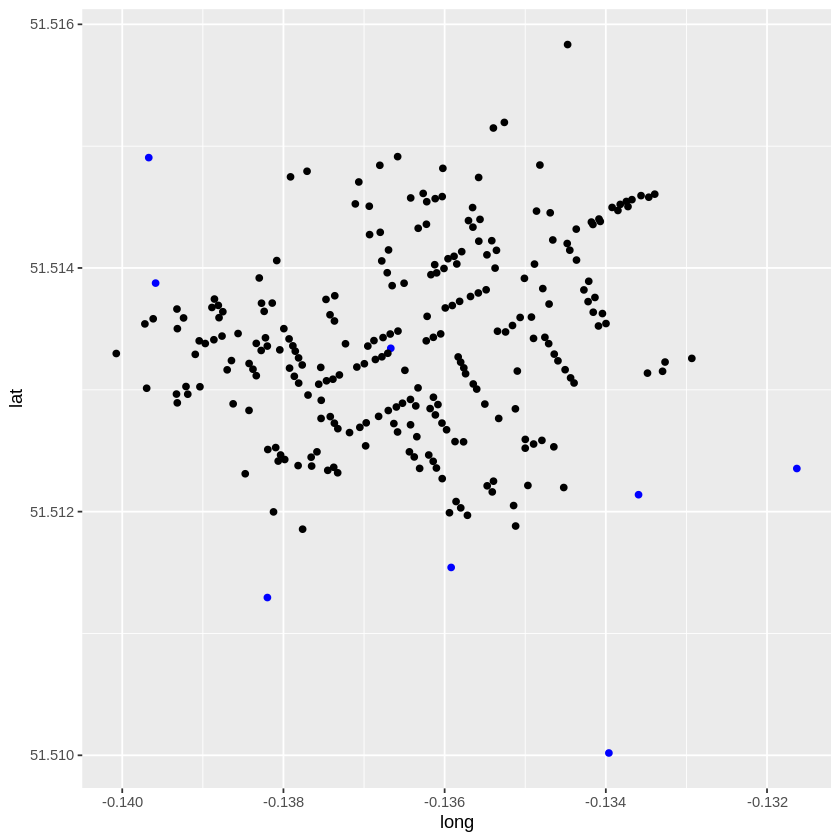

In [17]:
# Activity 5: plot deaths and pumps separately on the same plot (pumps: blue, deaths: black)

ggplot(cholera, aes(x=long, y=lat)) +  geom_point(data=wpumps, color='blue') + geom_point(data=cdeaths, color='black')

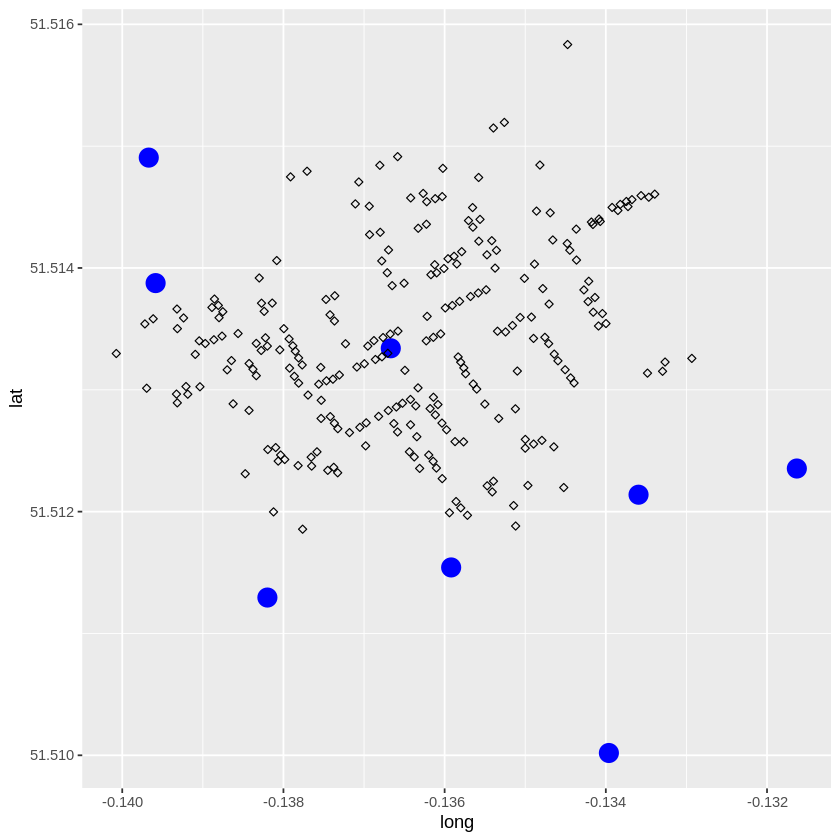

In [21]:
# Activity 6: Make pumps bigger, change the shape of deaths to diamond (hint: use shape=23)

ggplot(cholera, aes(x=long, y=lat)) +  geom_point(data=wpumps, color='blue', size=5) + geom_point(data=cdeaths, color='black', shape=23)

### Question: Does this plot show counts of deaths ? How do we incorporate that column to this plot ? 


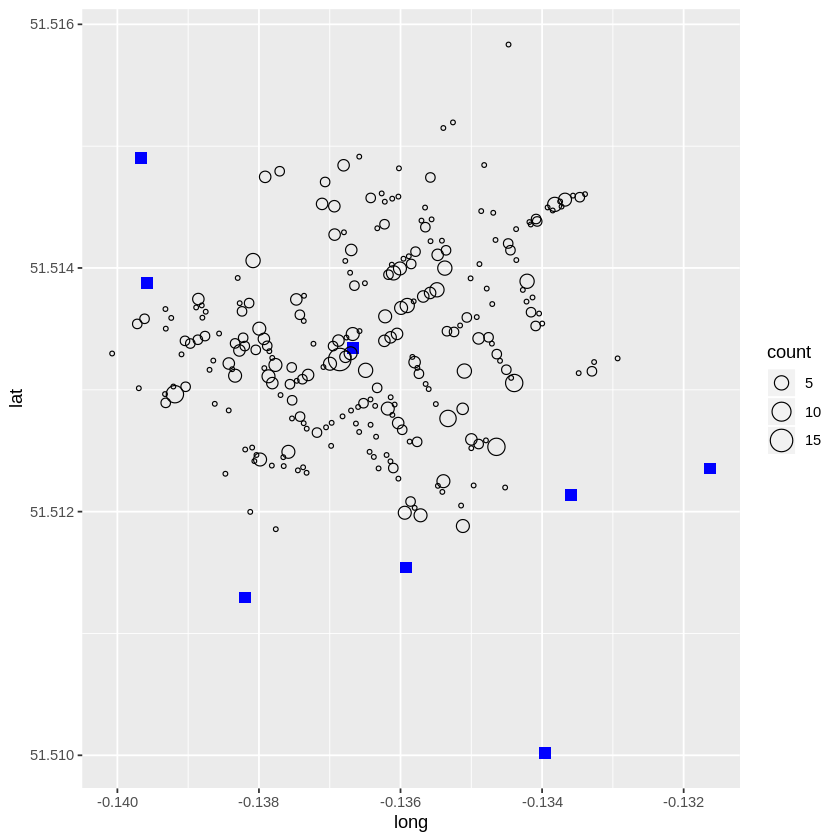

In [33]:
# Activity 7: FIND a way of showing number of deaths in the plot above

ggplot(cholera, aes(x=long, y=lat)) +  
geom_point(data=wpumps, color='blue', size=3, shape='square') + 
geom_point(data=cdeaths, aes(size=count), color='black', shape=1)